In [115]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics 
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv("D:\Project-ML\HTRU2 (1)\HTRU_2.csv")
data.columns = ['M1','ST1','EX1','SK1','M2','ST2','EX2','SK2','class']    
data.head()     

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
M1       17897 non-null float64
ST1      17897 non-null float64
EX1      17897 non-null float64
SK1      17897 non-null float64
M2       17897 non-null float64
ST2      17897 non-null float64
EX2      17897 non-null float64
SK2      17897 non-null float64
class    17897 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [67]:
data.describe()

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


In [92]:
#describe X as features and y as class. 
x=data[data.columns[:-1]]
y=data['class']

In [91]:
print(x)

               M1        ST1       EX1       SK1          M2        ST2  \
0      102.507812  58.882430  0.465318 -0.515088    1.677258  14.860146   
1      103.015625  39.341649  0.323328  1.051164    3.121237  21.744669   
2      136.750000  57.178449 -0.068415 -0.636238    3.642977  20.959280   
3       88.726562  40.672225  0.600866  1.123492    1.178930  11.468720   
4       93.570312  46.698114  0.531905  0.416721    1.636288  14.545074   
...           ...        ...       ...       ...         ...        ...   
17892  136.429688  59.847421 -0.187846 -0.738123    1.296823  12.166062   
17893  122.554688  49.485605  0.127978  0.323061   16.409699  44.626893   
17894  119.335938  59.935939  0.159363 -0.743025   21.430602  58.872000   
17895  114.507812  53.902400  0.201161 -0.024789    1.946488  13.381731   
17896   57.062500  85.797340  1.406391  0.089520  188.306020  64.712562   

             EX2         SK2  
0      10.576487  127.393580  
1       7.735822   63.171909  
2     

In [88]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,-0.334107,1.802379,-0.011822,-0.370549,-0.371110,-0.588931,0.504409,0.211560
1,-0.314311,-1.053271,-0.145268,-0.116613,-0.322117,-0.235343,-0.125997,-0.391379
2,1.000768,1.553363,-0.513438,-0.390191,-0.304414,-0.275681,-0.312261,-0.481304
3,-0.871346,-0.858823,0.115570,-0.104886,-0.388018,-0.763113,1.323985,1.386742
4,-0.682521,0.021788,0.050758,-0.219475,-0.372501,-0.605113,0.514453,0.249118


Text(0, 0.5, 'Inertia')

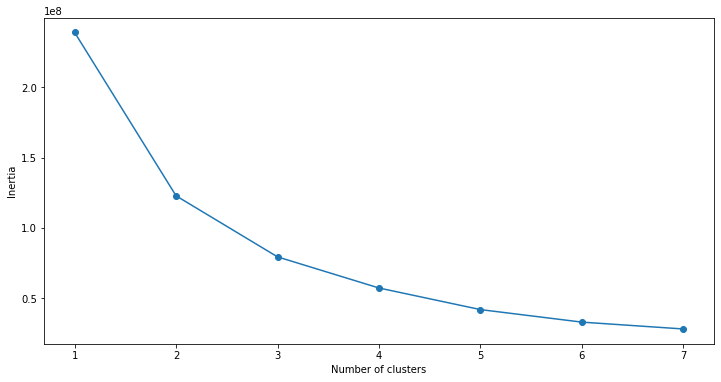

In [96]:
#using elbow method
SSE = []
# Defining the 5 cluster and calculating the sum of squared error in SSE
for cluster in range(1,8):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

    
import matplotlib.pyplot as plt
frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Apply K-Means for all features

In [117]:

##Standardize data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# k means using 2 cluster 
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X)
pred_K_X = kmeans.fit_predict(X)

frame = pd.DataFrame(X)
frame['cluster'] = pred_K_X
frame['cluster'].value_counts()

#Contingency matrix 
cm_k_X = contingency_matrix(y, pred_K_X)
print(cm_k_X)

#Classification report for all featuers
print("classification report")
print(classification_report(y, pred_K_X))

[[15482   776]
 [  358  1281]]
classification report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     16258
           1       0.62      0.78      0.69      1639

    accuracy                           0.94     17897
   macro avg       0.80      0.87      0.83     17897
weighted avg       0.94      0.94      0.94     17897



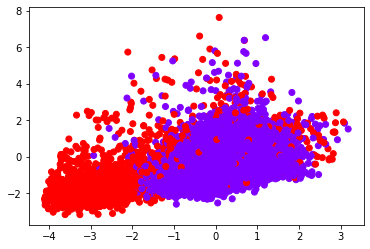

In [109]:
#Plotting the KMeans cluster=2
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=pred_K_X, cmap = 'rainbow')

# SPLITING FEATURES IN TWO PARTS


In [93]:
#Divide features in two parts, first 4 feature(x_1_4) and last four features(x_5_8)

X = data[data.columns[:-1]]        #remove the class
X_5_8= data.drop(['M1','ST1','EX1','SK1','class'], axis=1)  #remove first 4 columns and class   
X_1_4 = data.drop(['M2','ST2','EX2','SK2','class'], axis=1) #remove last 4 columns and class   
y = data['class']
print(X_1_4.head())
print(X_5_8.head())

           M1        ST1       EX1       SK1
0  102.507812  58.882430  0.465318 -0.515088
1  103.015625  39.341649  0.323328  1.051164
2  136.750000  57.178449 -0.068415 -0.636238
3   88.726562  40.672225  0.600866  1.123492
4   93.570312  46.698114  0.531905  0.416721
         M2        ST2        EX2         SK2
0  1.677258  14.860146  10.576487  127.393580
1  3.121237  21.744669   7.735822   63.171909
2  3.642977  20.959280   6.896499   53.593661
3  1.178930  11.468720  14.269573  252.567306
4  1.636288  14.545074  10.621748  131.394004


# FIRST FOUR FEATURES

In [118]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X_1_4 = StandardScaler().fit_transform(X_1_4)

# kmeans using 2 clusters 
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_1_4)
pred_K_X_1_4 = kmeans.fit_predict(X_1_4)

frame = pd.DataFrame(X_1_4)
frame['cluster'] = pred_K_X_1_4
frame['cluster'].value_counts()

#Contingency metrix
cm_K_X_1_4 = contingency_matrix(y, pred_K_X_1_4)
print(cm_K_X_1_4)

#Classification report for first four features
print("classification report")
print(classification_report(y, pred_K_X_1_4))

[[16242    16]
 [  659   980]]
classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     16258
           1       0.98      0.60      0.74      1639

    accuracy                           0.96     17897
   macro avg       0.97      0.80      0.86     17897
weighted avg       0.96      0.96      0.96     17897



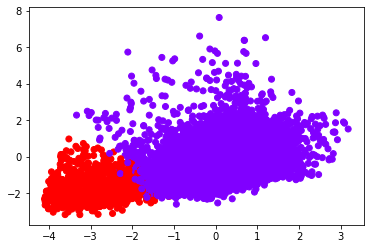

In [112]:
#Scatter plot shown the data point for cluster = 2 
plt.scatter(X_1_4[:, 0], X_1_4[:, 1], c=pred_K_X_1_4, cmap = 'rainbow')

# LAST FOUR FEATURES

In [119]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X_5_8 = StandardScaler().fit_transform(X_5_8) 

# kmeans using 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_5_8)
pred_K_X_5_8 = kmeans.fit_predict(X_5_8)

frame = pd.DataFrame(X_5_8)
frame['cluster'] = pred_K_X_5_8
frame['cluster'].value_counts()

#Contingency metrix
cm_K_X_5_8 = contingency_matrix(y, pred_K_X_5_8)
print(cm_K_X_5_8)

#Classification report for last four features
print("classification report")
print(classification_report(y, pred_K_X_5_8))


[[14862  1396]
 [  456  1183]]
classification report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     16258
           1       0.46      0.72      0.56      1639

    accuracy                           0.90     17897
   macro avg       0.71      0.82      0.75     17897
weighted avg       0.92      0.90      0.91     17897



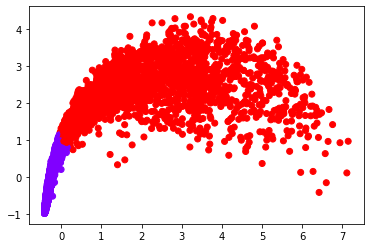

In [114]:
#Scatter plot shown the data point for cluster = 2 
plt.scatter(X_5_8[:, 0], X_5_8[:, 1], c=pred_K_X_5_8, cmap = 'rainbow')
